True

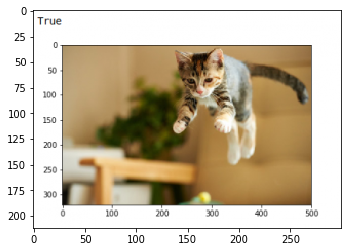

In [3]:
#import the libraries

import numpy as np

import matplotlib.pyplot as plt

import cv2

%matplotlib inline



#reading the image 



image = cv2.imread('upload1.png-300x212.png')

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#plotting the image

plt.imshow(image)



#saving image

cv2.imwrite('test_write.jpg',image)

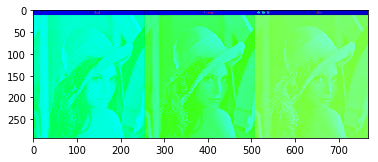

In [6]:
#import the required libraries 

import numpy as np 

import matplotlib.pyplot as plt 

import cv2 

%matplotlib inline 

image = cv2.imread('rgbexample-768x293.png') 

#converting image to Gray scale 

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#plotting the grayscale image

plt.imshow(gray_image) 

#converting image to HSV format

hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

#plotting the HSV image

plt.imshow(hsv_image)

In [36]:
import cv2 

import numpy as np 

import matplotlib.pyplot as plt 

%matplotlib inline 

#reading the image 

image = cv2.imread('resizing1.jpg') 

#converting image to size (100,100,3) 

smaller_image = cv2.resize(image,(100,100),inerpolation='linear') 

#plot the resized image

plt.imshow(smaller_image)

TypeError: 'inerpolation' is an invalid keyword argument for resize()

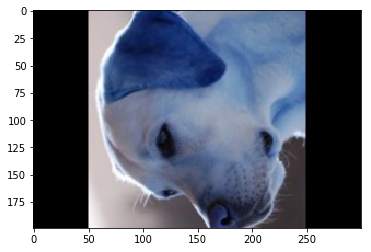

In [20]:
#importing the required libraries 

import numpy as np 

import cv2 

import matplotlib.pyplot as plt 

%matplotlib inline 

image = cv2.imread('Labrador_Retriever_portrait-300x199.jpg') 

rows,cols = image.shape[:2] 

#(col/2,rows/2) is the center of rotation for the image 

# M is the cordinates of the center 

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 

dst = cv2.warpAffine(image,M,(cols,rows)) 

plt.imshow(dst)

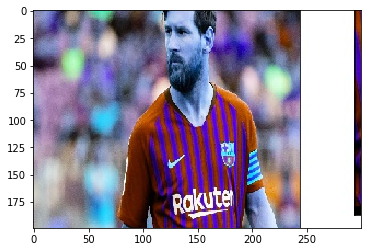

In [21]:
#importing the required libraries 

import numpy as np 

import cv2 

import matplotlib.pyplot as plt 

%matplotlib inline 

#reading the image

image = cv2.imread('translation.jpg')

#shifting the image 100 pixels in both dimensions

M = np.float32([[1,0,-100],[0,1,-100]]) 

dst = cv2.warpAffine(image,M,(cols,rows)) 

plt.imshow(dst)

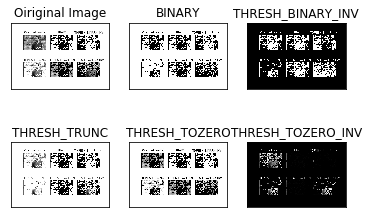

In [22]:
#importing the required libraries 

import numpy as np 

import cv2 

import matplotlib.pyplot as plt 

%matplotlib inline 



#here 0 means that the image is loaded in gray scale format

gray_image = cv2.imread('thresholding.jpg',0)



ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)

ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)

ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)

ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)

ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)



#DISPLAYING THE DIFFERENT THRESHOLDING STYLES

names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']

images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv



for i in range(6):

    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')

    plt.title(names[i])

    plt.xticks([]),plt.yticks([])

    

plt.show()

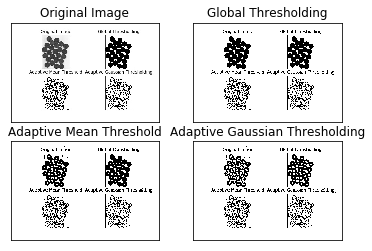

In [24]:
#import the libraries

import numpy as np

import matplotlib.pyplot as plt

import cv2

%matplotlib inline



#ADAPTIVE THRESHOLDING

gray_image = cv2.imread('adaptive_thresholding.jpg',0)



ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)

#here 11 is the pixel neighbourhood that is used to calculate the threshold value

thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)



thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)



names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']

images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]



for i in range(4):

    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')

    plt.title(names[i])

    plt.xticks([]),plt.yticks([])

    

plt.show()

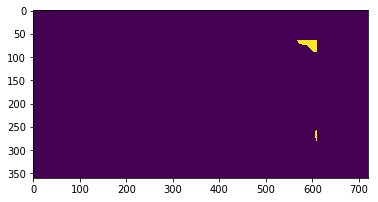

In [25]:
#importing required libraries

import numpy as np

import cv2

import matplotlib.pyplot as plt



#reading the image

image = cv2.imread('watershed.jpg')

#converting image to grayscale format

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#apply thresholding

ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#get a kernel

kernel = np.ones((3,3),np.uint8)

opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)

#extract the background from image

sure_bg = cv2.dilate(opening,kernel,iterations = 3)



dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)



sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_bg)



ret,markers = cv2.connectedComponents(sure_fg)



markers = markers+1



markers[unknown==255] = 0



markers = cv2.watershed(image,markers)

image[markers==-1] = [255,0,0]



plt.imshow(sure_fg)

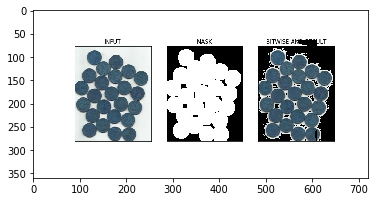

In [26]:
#import required libraries

import numpy as np 

import matplotlib.pyplot as plt 

import cv2 

%matplotlib inline 

#read the image

image = cv2.imread('bitwise_operation.jpg')

#apply thresholdin 

ret,mask = cv2.threshold(sure_fg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 

#apply AND operation on image and mask generated by thrresholding

final = cv2.bitwise_and(image,image,mask = mask) 

#plot the result

plt.imshow(final)

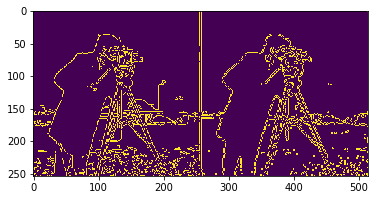

In [28]:
#import the required libraries

import numpy as np 

import cv2 

import matplotlib.pyplot as plt 

%matplotlib inline

#read the image

image = cv2.imread('edgeDetection.png') 

#calculate the edges using Canny edge algorithm

edges = cv2.Canny(image,100,200) 

#plot the edges

plt.imshow(edges)

TypeError: imshow() missing 1 required positional argument: 'X'

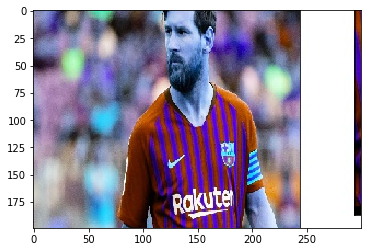

In [32]:
#importing the required libraries 

import numpy as np 

import cv2 

import matplotlib.pyplot as plt 

%matplotlib inline 

image = cv2.imread('gaussian1.jpg') 

#using the averaging kernel for image smoothening 

averaging_kernel = np.ones((3,3),np.float32)/9 

filtered_image = cv2.filter2D(image,-1,kernel) 

plt.imshow(dst) 

#get a one dimensional Gaussian Kernel 

gaussian_kernel_x = cv2.getGaussianKernel(5,1) 

gaussian_kernel_y = cv2.getGaussianKernel(5,1) 

#converting to two dimensional kernel using matrix multiplication 

gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 

#you can also use cv2.GaussianBLurring(image,(shape of kernel),standard deviation) instead of cv2.filter2D 

filtered_image = cv2.filter2D(image,-1,gaussian_kernel) 

plt.imshow()

In [33]:
#importing the required libraries 

import numpy as np 

import cv2 

import matplotlib.pyplot as plt 

%matplotlib inline 

image = cv2.imread('contours.jpg') 

#converting RGB image to Binary 

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 

ret,thresh = cv2.threshold(gray_image,127,255,0) 

#calculate the contours from binary image

im,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 

with_contours = cv2.drawContours(image,contours,-1,(0,255,0),3) 

plt.imshow(with_contours)

ValueError: not enough values to unpack (expected 3, got 2)

In [37]:
#import required libraries

import cv2

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

#show OpenCV version

print(cv2.__version__)

#read the iamge and convert to grayscale

image = cv2.imread('surf_keypoints1.jpg')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#create sift object

sift  = cv2.xfeatures2d.SIFT_create()

#calculate keypoints and their orientation

keypoints,descriptors = sift.detectAndCompute(gray,None)

#plot keypoints on the image

with_keypoints = cv2.drawKeypoints(gray,keypoints)

#plot the image

plt.imshow(with_keypoints)

4.1.0


AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [39]:
#import required libraries

import cv2

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

#show OpenCV version

print(cv2.__version__)

#read image and convert to grayscale

image = cv2.imread('sift_keypoints.jpg')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#instantiate surf object

surf  = cv2.xfeatures2d.SURF_create(400)

#calculate keypoints and their orientation

keypoints,descriptors = surf.detectAndCompute(gray,None)



with_keypoints = cv2.drawKeypoints(gray,keypoints)



plt.imshow(with_keypoints)

4.1.0


AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [43]:
#import required libraries

import numpy as np

import cv2 as cv

import matplotlib.pyplot as plt

%matplotlib inline



#load the classifiers downloaded 

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

#read the image and convert to grayscale format

img = cv.imread('face_detection.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#calculate coordinates 

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces:

    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    roi_gray = gray[y:y+h, x:x+w]

    roi_color = img[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)

    #draw bounding boxes around detected features

    for (ex,ey,ew,eh) in eyes:

        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

#plot the image

plt.imshow(img)

#write image 

cv2.imwrite('face_detection.jpg',img)

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1658: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [47]:
import numpy as np

import cv2 as cv

import matplotlib.pyplot as plt

%matplotlib inline



#load the classifiers downloaded 

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

#read the image and convert to grayscale format

img = cv.imread('face_detection.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#calculate coordinates 

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces:

    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    roi_gray = gray[y:y+h, x:x+w]

    roi_color = img[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)

    #draw bounding boxes around detected features

    for (ex,ey,ew,eh) in eyes:

        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

#plot the image

plt.imshow(img)

#write image 

cv2.imwrite('face_detection.jpg',img)

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1658: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [49]:
def show(image):
# Figure size in inches
    plt.figure(figsize=(15, 15))

# Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')

def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)

def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')

def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [84]:
 image=cv2.imread('strawberries_new.jpg')

In [85]:
image.shape

(590, 874, 3)

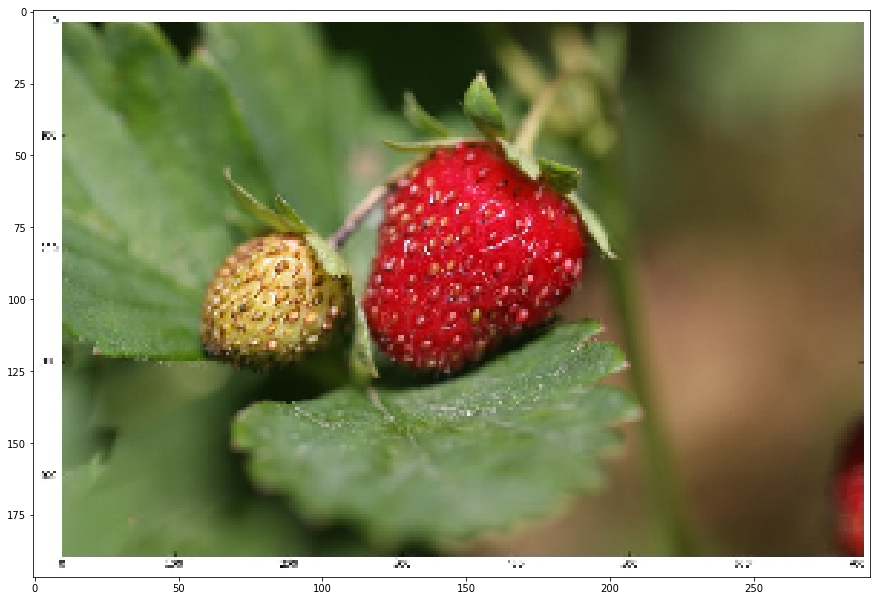

In [89]:
show(image)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.resize(image,None,fx=1/3,fy=1/3)

In [1]:
 import pandas as pd
m,n,r =image.shape
arr=image.reshape(m*n,-1)
df=pd.DataFrame(arr,columns=['b','g','r'])
df.describe()

NameError: name 'image' is not defined

In [ ]:
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
show(np.vstack(images))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

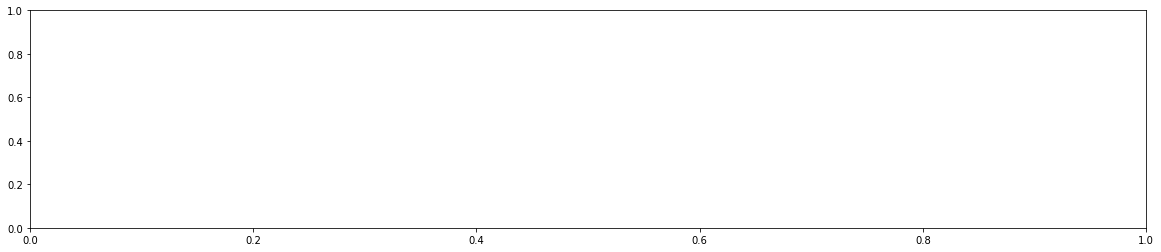

In [64]:
def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
# plt.plot(histr, color=c, lw=2)

        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]

    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
# plt.xlim([0, 256])

plt.show()

show_rgb_hist(image)

In [66]:
 def show(image):
# Figure size in inches
    plt.figure(figsize=(15, 15))

# Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
        
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)

def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')

def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    img=cv2.imread('download.png')
    show(img)

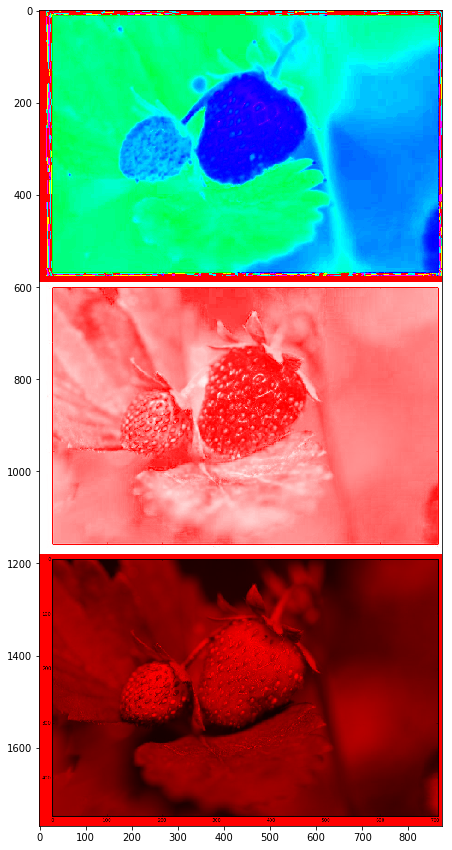

In [67]:
 hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)

hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

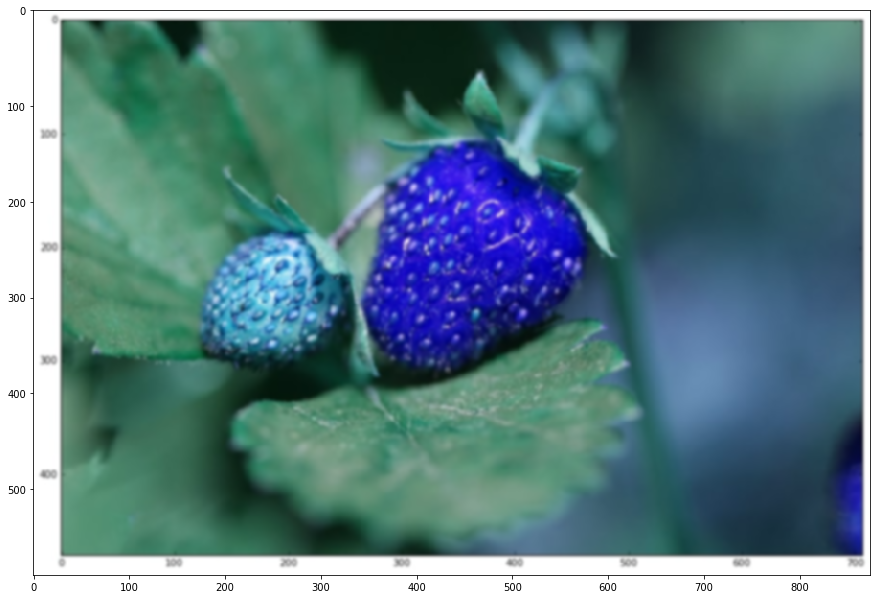

In [68]:
 image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

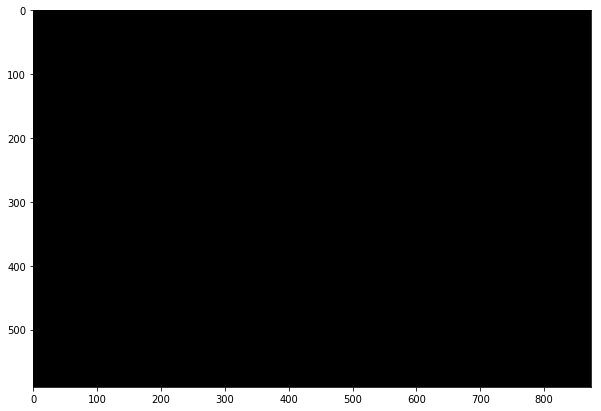

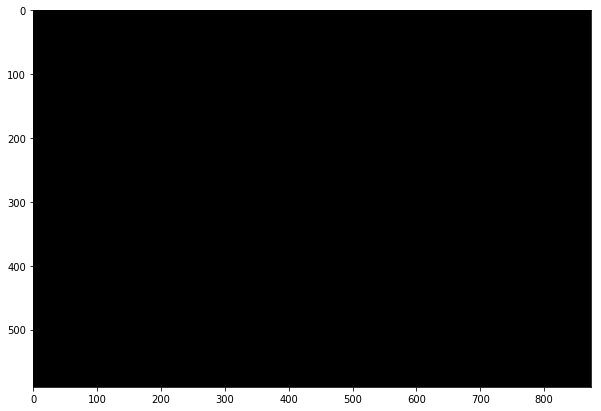

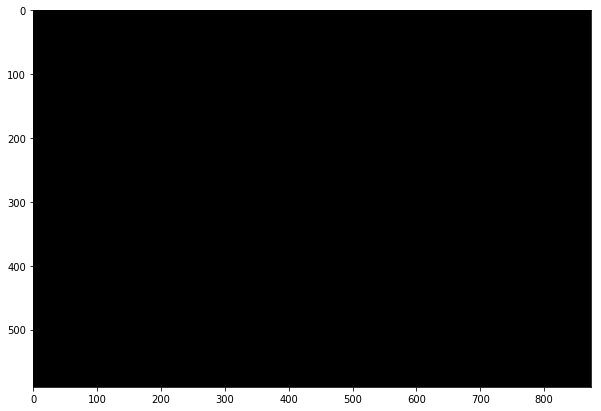

In [69]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([170, 100, 80])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)

In [70]:
image_red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

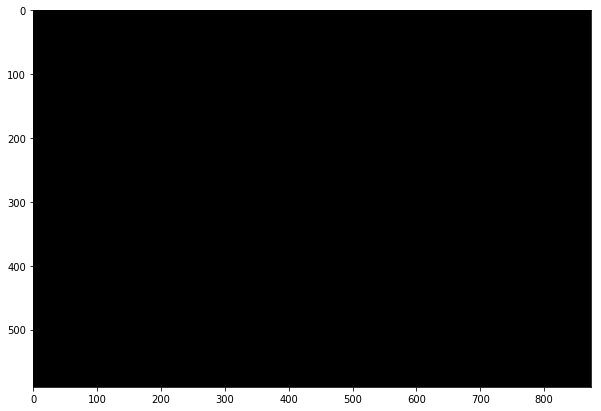

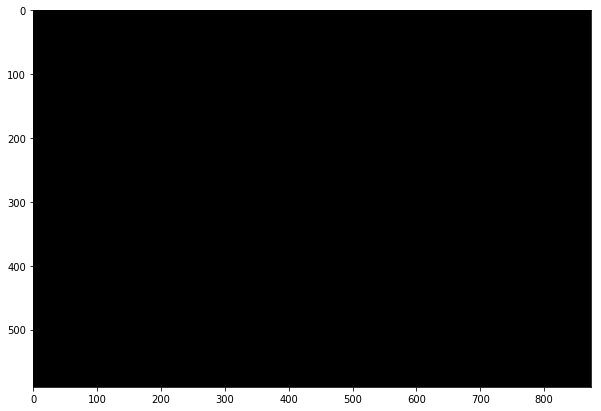

In [73]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
# show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

In [79]:
def find_biggest_contour(image):

# Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))

# Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(red_mask)

0


ValueError: max() arg is an empty sequence

In [78]:
overlay_mask(red_mask, image)

NameError: name 'red_mask' is not defined

In [80]:
 # Centre of mass
moments = cv2.moments(red_mask)
centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
image_with_com = image.copy()
cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1, cv2.CV_AA)
show(image_with_com)

# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)

NameError: name 'red_mask' is not defined